In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '../data/raw/Tweets.csv'

df = pd.read_csv(file_path)
df = df[['text', 'airline_sentiment', 'airline']]

print(f"Dataset shape: {df.shape}")
df.head()



Dataset shape: (14640, 3)


,text,airline_sentiment,airline
0,@VirginAmerica What @dhepburn said.,neutral,Virgin America
1,@VirginAmerica plus you've added commercials t...,positive,Virgin America
2,@VirginAmerica I didn't today... Must mean I n...,neutral,Virgin America
3,@VirginAmerica it's really aggressive to blast...,negative,Virgin America
4,@VirginAmerica and it's a really big bad thing...,negative,Virgin America


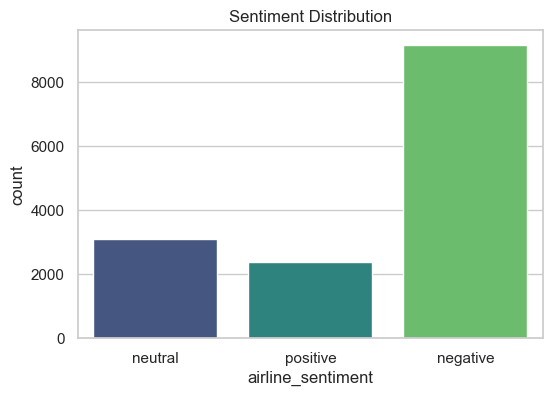

In [2]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='airline_sentiment', hue='airline_sentiment', dodge=False, palette='viridis', legend=False)
plt.title('Sentiment Distribution')
plt.show()




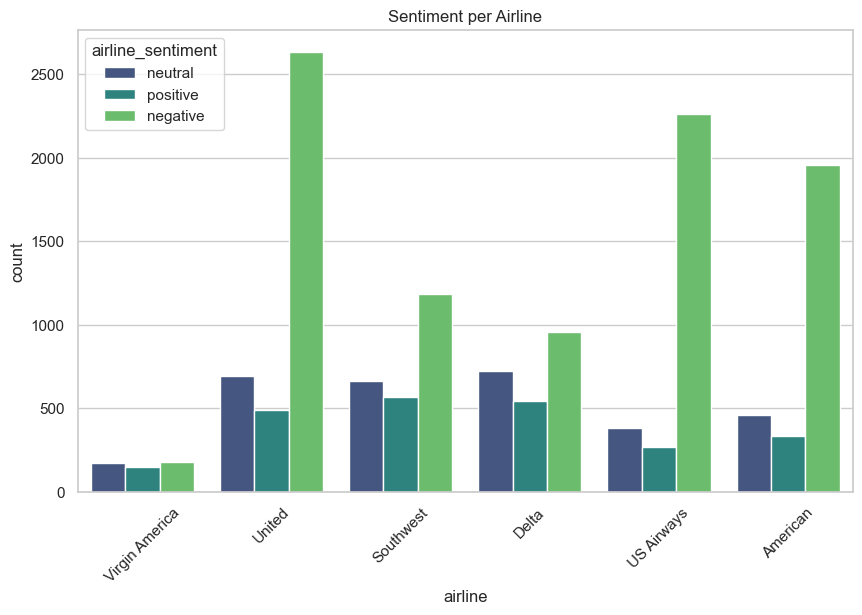

In [3]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='airline', hue='airline_sentiment', palette='viridis')
plt.title('Sentiment per Airline')
plt.xticks(rotation=45)
plt.show()


In [4]:
sentiment_counts = df['airline_sentiment'].value_counts()
sentiment_percentages = df['airline_sentiment'].value_counts(normalize=True) * 100

print("Sentiment Counts:\n", sentiment_counts)
print("\nSentiment Percentages:\n", sentiment_percentages.round(2))


Sentiment Counts:
 airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

Sentiment Percentages:
 airline_sentiment
negative    62.69
neutral     21.17
positive    16.14
Name: proportion, dtype: float64


In [5]:
import re
import string

def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove links
    text = re.sub(r'http\S+', '', text)
    
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags (opcional: podemos manter palavras sem #)
    text = re.sub(r'#\w+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()


,text,clean_text
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...
2,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...
3,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...
4,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it


In [6]:
print("Exemplo antes da limpeza:")
print(df.iloc[0]['text'])
print("\nExemplo após limpeza:")
print(df.iloc[0]['clean_text'])


Exemplo antes da limpeza:
@VirginAmerica What @dhepburn said.

Exemplo após limpeza:
what said


In [7]:
output_path = '../data/processed/feedback_clean.csv'
df.to_csv(output_path, index=False)
print(f'Dataset saved to {output_path}')


Dataset saved to ../data/processed/feedback_clean.csv


In [8]:
df[['airline_sentiment', 'clean_text']].sample(10, random_state=42)


,airline_sentiment,clean_text
4794,positive,youre my early frontrunner for best airline
10480,negative,how is it that my flt to ewr was cancelled fli...
8067,negative,what is going on with your bdl to dca flights ...
8880,neutral,do they have to depart from washington dc
8292,negative,i can probably find some of them are the ticke...
927,negative,still waiting to hear back my wallet was stole...
3165,negative,yes my flight was rebooked im just losing trus...
7894,neutral,thank you what about paris could we arrange so...
2818,negative,not 100 sure however my ticket included one ch...
9145,positive,great crew for flight 504 phx to yvr tonight f...


In [9]:
pip install wordcloud


     -------------------------------------- 299.9/299.9 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


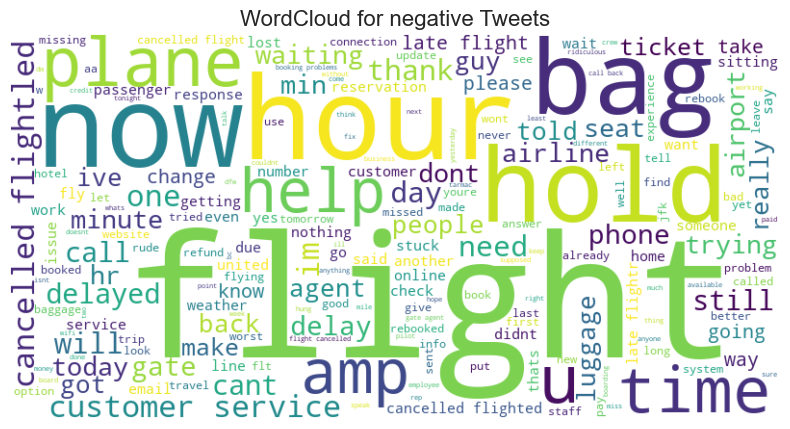

In [10]:
from wordcloud import WordCloud

def generate_wordcloud(sentiment_label):
    text = " ".join(df[df['airline_sentiment'] == sentiment_label]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment_label} Tweets', fontsize=16)
    plt.show()

# Example: Wordcloud for negative tweets
generate_wordcloud('negative')
